<a href="https://colab.research.google.com/github/Aditya-Sihmar/face_reconstruction/blob/master/downgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorboard as tb
import PIL 
import os
import cv2
from tqdm import tqdm
import random

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
'''
The dataset is in my drive. Link is below
https://drive.google.com/open?id=12g0B4EMjxl5Led_fnNPU_UzfrCRB1x_O
'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class Augement():
  '''
  This is the class to downsample the dataset. It adds various type of noises in the data.
  All of its methods just require an opencv Image as an input and returns a noisy image.
  '''
  def __init__(self):
    pass
  def rndm_noise(self, img):
    '''
    This Method randomly chosses the noises from an available set of noises and apply to the Image.
    Parameters: opencv image
    '''
    lst = [self.gausian,
           self.snp,
           self.poisson,
           self.sp]
    rnd = np.random.randint(1, 2)
    for i in range(rnd):
      img = random.choice(lst)(img)
    return img

  def gausian(self, img):
    '''
    It adds random gausian noise to the image
    '''
    row,col= img.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy

  def snp(self, img):
    '''
    It adds salt and pepper noise to the image
    '''
    prb = np.random.uniform(0, 0.05)
    otpt = np.zeros(img.shape, dtype= np.uint8)
    thres = 1 - prb
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        rnd = random.random()
        if rnd < prb:
          otpt[i][j] = 0
        elif rnd > thres:
          otpt[i][j] = 255
        else:
          otpt[i][j] = img[i][j]
    return otpt
  
  def poisson(self, img):
    '''
    It adds poissons noise to the image.
    '''
    lam = np.random.randint(10, 40)
    noise = np.random.poisson(lam, img.shape)
    output = img + noise
    return output

  def sp(self, img):
    '''
    It adds Speckle noise to the Image.
    '''
    prob = np.random.uniform(0.01, 0.05)
    output = np.zeros(img.shape, np.uint8)
    thres = 1-prob
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        rnd = random.random()
        if rnd< prob:
          output[i][j] = 128
          for k in range(5):
            output[i-k][j-k] = 128 + 10*rnd
        else:
          output[i][j] = img[i][j]
    return output

In [0]:
#This code will read the images from path1 and will add the noise to the image and store the noisy images to the "noisy1" list.
#The orignal image will be added to the "orgnl1" list
path1 = '/content/drive/My Drive/dataset/1'
path2 = '/content/drive/My Drive/dataset/2'
noisy1 = []
orgnl1 = []
agmt = Augement()
for s in tqdm(os.listdir(path1)):
  pht = cv2.imread(os.path.join(path1, s), 0)
  orgnl1.append(pht)
  img = agmt.rndm_noise(pht)
  noisy1.append(img)


100%|██████████| 10017/10017 [1:19:33<00:00,  2.10it/s]


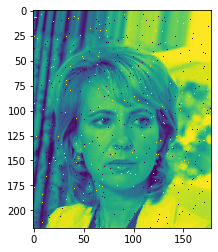

In [0]:
plt.imshow(noisy1[100])

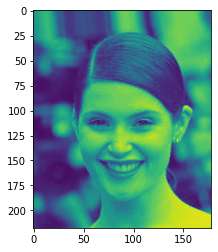

In [0]:
plt.imshow(ornl1[100])

In [0]:
#This code will read the images from path2 and will add the noise to the image and store the noisy images to the "noisy2" list.
#The orignal image will be added to the "orgnl2" list
noisy2 = []
orgnl2 = []
a = 0
for s in tqdm(os.listdir(path2)):
  pht = cv2.imread(os.path.join(path2, s), 0)
  orgnl2.append(pht)
  img = agmt.rndm_noise(pht)
  noisy2.append(img)
  a+=1

  0%|          | 178/45419 [00:05<21:55, 34.39it/s]


KeyboardInterrupt: ignored

In [0]:
#To save the noisy1 images in a folder with path wpath1
wpath1= '/content/drive/My Drive/dataset/1_noisy'
a = '1'
for q in tqdm(noisy1):
  img = PIL.Image.fromarray((q).astype(np.uint8))
  img.save(os.path.join(wpath1, a)+'.jpeg')
  a = str(int(a) + 1)

100%|██████████| 10017/10017 [37:55<00:00,  4.40it/s] 


In [0]:
#To save the noisy2 images in a folder with path wpath2
wpath2= '/content/drive/My Drive/dataset/2_noisy'
for q in tqdm(noisy2):
  img = PIL.Image.fromarray((q).astype(np.uint8))
  img.save(os.path.join(wpath2, a)+'.jpeg')
  a = str(int(a) + 1)

100%|██████████| 45419/45419 [07:21<00:00, 102.78it/s]


In [0]:
len(data2)

45419